# Imports

In [1]:
%pip install -i https://test.pypi.org/simple/ coupledvae -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 7.4 MB/s eta 0:00:00


In [2]:
from coupledvae.VAECIFAR import VAE
from coupledvae.experiment_utils import *
from coupledvae.setup_funcs import *
from datetime import datetime

Importing NSC lib v0.0.0.2.


# Mount GDRIVE

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load Data


Extracting CIFAR10 dataset...



Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incompleteAX4SAG/cifar10-train.tfrecord*...:   0%|          | 0/…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incompleteAX4SAG/cifar10-test.tfrecord*...:   0%|          | 0/1…

Dataset cifar10 downloaded and prepared to ~/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_path='~/tensorflow_datasets/cifar10/3.0.2',
    file_format=tfrecord,
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,

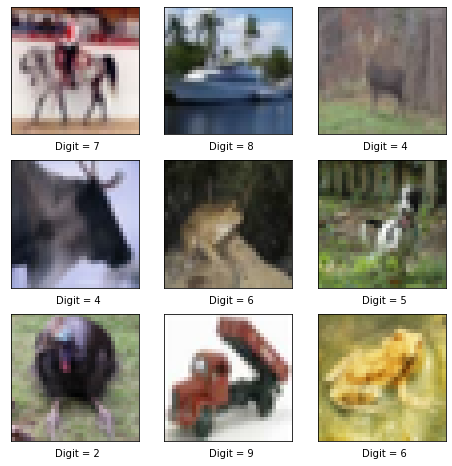

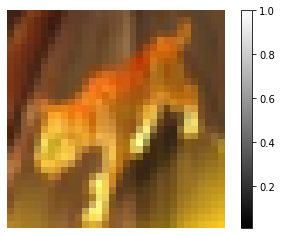

 - Print one test set image:
cifar10


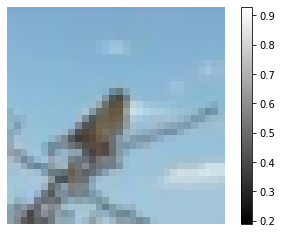

 - Print one test set label:
2



Extracting CIFAR10_CORRUPTED/SHOT_NOISE_1 dataset...



Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10_corrupted/shot_noise_1/1.0.0.incompleteDMNBKC/cifar10_corrupted-test.t…

Dataset cifar10_corrupted downloaded and prepared to ~/tensorflow_datasets/cifar10_corrupted/shot_noise_1/1.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='cifar10_corrupted',
    full_name='cifar10_corrupted/shot_noise_1/1.0.0',
    description="""
    Cifar10Corrupted is a dataset generated by adding 15 common corruptions + 4
    extra corruptions to the test images in the Cifar10 dataset. This dataset wraps
    the corrupted Cifar10 test images uploaded by the original authors.
    """,
    config_description="""
    Corruption method: shot_noise, severity level: 1
    """,
    homepage='https://github.com/hendrycks/robustness',
    data_path='~/tensorflow_datasets/cifar10_corrupted/shot_noise_1/1.0.0',
    file_format=tfrecord,
    download_size=2.72 GiB,
    dataset_size=24.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    sup

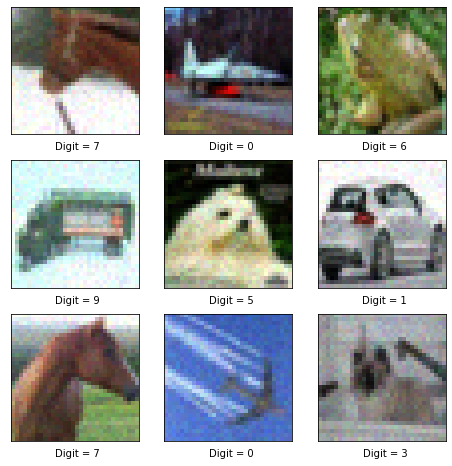

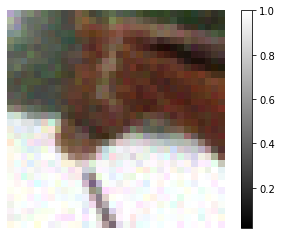

 - Print one test set label:
7




In [4]:
# Random seed is the microsecond for current time.
random_seed = datetime.now().microsecond

# Set the training and testing batch sizes.
BATCH_SIZE_TRAIN = 128
BATCH_SIZE_TEST = 5000
# BATCH_SIZE_TEST = BATCH_SIZE_TRAIN
# The number at which to split training sets and validation set, with training 
# set size = mnist_split, and validation = 60000 - mnist_split.
train_split = '45000' 

# List the different mnist data sets to use. The first should be the training
# dataset.
#corrupted_names = ['identity', 'motion_blur', 'shot_noise', 'spatter', 'fog']
corrupted_names = ['shot_noise_1']

dataset_type = 'cifar10'
datasets_names = [dataset_type] +  [
  f'{dataset_type}_corrupted/{corrupted_name}' for corrupted_name in corrupted_names
  ]

# Hack needed for cifar10 since the identity dataset doesn't exist
corrupted_names = ['identity'] + corrupted_names
# datasets_names = ['cifar10', 'mnist']

# Download the data sets.
datasets = get_datasets_(
    datasets_names, 
    BATCH_SIZE_TRAIN, 
    BATCH_SIZE_TEST, 
    train_split, 
    random_seed
    )

training_datasets = ['train/']
testing_datasets = ['test/' + name.split('/')[1] for name in datasets_names[1:]]
#training_datasets = [datasets_names[0]]

# Get the list of keys from the datasets dict.
testing_datasets = list(datasets.keys())
# Drop 'mnist', so only the corrupted dataset names remain.
testing_datasets = [dataset for dataset in datasets if 'corrupted' not in dataset]
# Create an empty dictionary to hold only the testing datasets.
testing_datasets_dict = dict()
# Loop through the corrupted dataset names.
for dataset in testing_datasets:
  # Add the corrupted data set to the new dictionary.
  testing_datasets_dict[dataset] = datasets[dataset]


# Set Hyperparameters

In [5]:
check_gpu_availibility()

SUCCESS: Found GPU: /device:GPU:0


In [6]:
###
# VAE Initializing Parameters
###

# Latent dim, set the dimensionality of the latent space.
z_dim_vals = [256]#[2, 4, 8, 16]
# Whether to use the analytical coupled divergence, or approximate.
analytic_kl = True
# Set the weight to place on the coupled dsivergence.
beta = 1. # 1., 2., ..., 10.
# Set the standard deviation of the prior distribution.
p_std = 1.
# Set the loss coupling.
loss_coupling_vals = [0.1]#[1e-6, 0.025, 0.05, 0.075, 0.1, 0.2]
# Set the number of base filters in the CNN.
n_filter_base = 64
# Set the learning rate for the Adam optimizer.
#learning_rate = 0.00025
learning_rate = 5e-4


###
# VAE Training Parameters
###

# Set the number of epochs to display.
n_epoch = 1200
# Set the number of epochs before plots are displayed.
n_epoch_display = 10
# Whether or not to display plots while training.
show_display = True
display_sample = True


###
# Setting Paths
###

# Set the version of the code being run.
version = 'v9pt1_August_02_2022'
# Create the root path where the data will be stored.
#save_path = Path(
#    f'gdrive/My Drive/Colab Notebooks/coupled_vae/vae/output/{version}/'
#    )
save_path = Path(
    f'gdrive/My Drive/Colab Notebooks/Coupled VAE Public/{version}/'
    )
# If the path does not exist, make it.
save_path.mkdir(parents=True, exist_ok=True)

# Set the dirctory where run results will be saved.
model_path = save_path / str(random_seed)
model_path.mkdir(parents=True, exist_ok=True)

# Create the folders for this run in the google drive. It will not override 
# existing version and seed folders
create_gdrive_output_folders(model_path,
                             img_folders=corrupted_names)

# Save the parameters in a dict.
param_dict = {
  'random_seed': random_seed,
  'z_dim_vals': z_dim_vals,
  'analytic_kl': analytic_kl,
  'beta': beta,
  'p_std': p_std,
  'loss_coupling_vals': loss_coupling_vals,
  'n_filter_base': n_filter_base,
  'learning_rate': learning_rate,
  'n_epoch': n_epoch,
  'n_epoch_display': n_epoch_display,
  'train_batch_size': BATCH_SIZE_TRAIN,
  'test_batch_size': BATCH_SIZE_TEST,
  'val_split': train_split,
  'dataset_type': 'cifar10',
  'datasets': datasets_names,
  'show_display': show_display,
  'display_sample': show_display,
  'model_path': model_path
}

# Set the path for the experiment tracking CSV file.
experiment_tracker_path = save_path / 'experiment_tracker.csv'
# Update the file.
update_experiments(param_dict, experiment_tracker_path)

# Set the training and testing paths.
training_path = model_path / 'train'
testing_path = model_path / 'test'

Reading [gdrive/My Drive/Colab Notebooks/Coupled VAE Public/v9pt1_August_02_2022/experiment_tracker.csv]
Updating [gdrive/My Drive/Colab Notebooks/Coupled VAE Public/v9pt1_August_02_2022/experiment_tracker.csv]
Writing [gdrive/My Drive/Colab Notebooks/Coupled VAE Public/v9pt1_August_02_2022/experiment_tracker.csv]


# Train VAE

In [7]:
early_stop = 20

vae_dict = train_VAEs(
    loss_coupling_vals=loss_coupling_vals, 
    z_dim_vals=z_dim_vals,
    n_filter_base=n_filter_base,
    beta=beta,
    p_std=p_std, 
    analytic_kl=analytic_kl, 
    n_epoch=n_epoch,
    n_epoch_display=n_epoch_display, 
    datasets=datasets,
    dataset_type=dataset_type,
    datasets_names=training_datasets,
    random_seed=random_seed, 
    model_path=training_path,
    show_display=show_display,
    early_stop=early_stop
    )

Epoch: 2, Train set Loss: 1601.0714912523065,
 Train set Recon: 1569.2849345097277, Train set KL: 31.78655674257862, 
Val set Loss: 1576.4182105168143,
 Val set Recon: 1545.1181960753681, Val set KL: 31.300014441446127, 
time elapse for current epoch: 25.798884630203247
Saving model checkpoint at epoch 2
gdrive/My Drive/Colab Notebooks/Coupled VAE Public/v9pt1_August_02_2022/683342/train

ELBO GENERALIZED MEANS

RECONSTRUCTION GENERALIZED MEANS

DIVERGENCE GENERALIZED MEANS


# Plot Training Performance

In [8]:
# Plot the latent space.
if z_dim_vals == [2]:
  for vae_key in vae_dict.keys():
    print(f'Latent Space for {vae_key}')
    plot_latent_images(vae_dict[vae_key].model, n=15, digit_size=28)

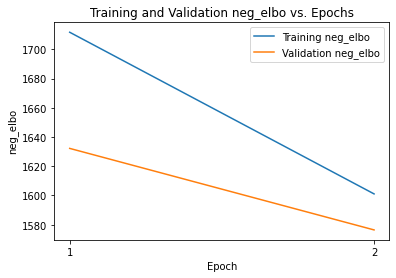

In [9]:
plot_training(vae_dict, metric='neg_elbo')

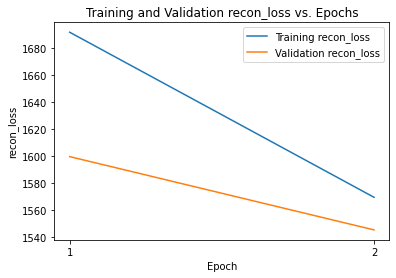

In [10]:
plot_training(vae_dict, metric='recon_loss')

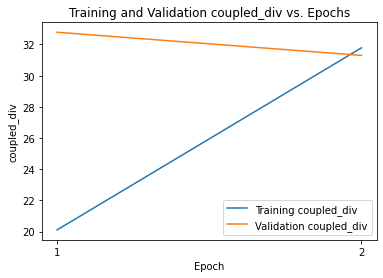

In [11]:
plot_training(vae_dict, metric='coupled_div')

In [12]:
best_model_epoch = vae_dict[''].val_metrics_df.loc[
  vae_dict[''].val_metrics_df['val_neg_elbo'] == vae_dict[''].val_metrics_df['val_neg_elbo'].min()
].index.values + 1

print(f'The best model was saved at epoch {best_model_epoch[0]}.')

The best model was saved at epoch 2.


# Test

In [13]:
vae = vae_dict['']
vae = VAE(z_dim=vae.__dict__['z_dim'],
          n_filter_base = n_filter_base,
          beta=vae.__dict__['beta'], 
          p_std=vae.__dict__['p_std'], 
          loss_coupling=vae.__dict__['loss_coupling'],
          analytic_kl=vae.__dict__['analytic_kl'], 
          dtype=vae.__dict__['dtype'], 
          display_path=vae.__dict__['display_path'],
          input_type = dataset_type
)

# Load the best model by validation set performance from the checkpoints.
vae.model.load_weights(str(model_path) + '/train/cp.ckpt')

Model initialized


In [14]:
# Get the list of keys from the datasets dict.
testing_datasets = list(datasets.keys())
# Drop 'mnist', so only the corrupted dataset names remain.
testing_datasets.remove(dataset_type)
# Create an empty dictionary to hold only the testing datasets.
testing_datasets_dict = dict()
# Loop through the corrupted dataset names.
for dataset in testing_datasets:
  # Add the corrupted data set to the new dictionary.
  testing_datasets_dict[dataset] = datasets[dataset]

Test set Loss: 1579.5666914351893, Test set Recon: 1548.2919382669265, Test set KL: 31.2747531682626

ELBO GENERALIZED MEANS

RECONSTRUCTION GENERALIZED MEANS

DIVERGENCE GENERALIZED MEANS
(16, 32, 32, 3)


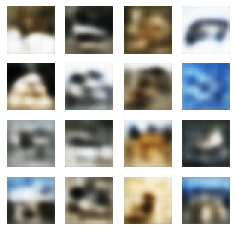

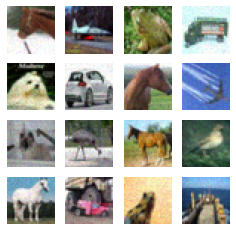

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


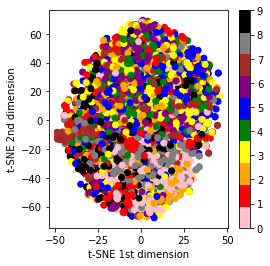

/usr/local/lib/python3.8/dist-packages/coupledvae/Visualize.py:228: RuntimeWarning: invalid value encountered in log
  xtick_axis = [np.log(xtick) for xtick in xticks]


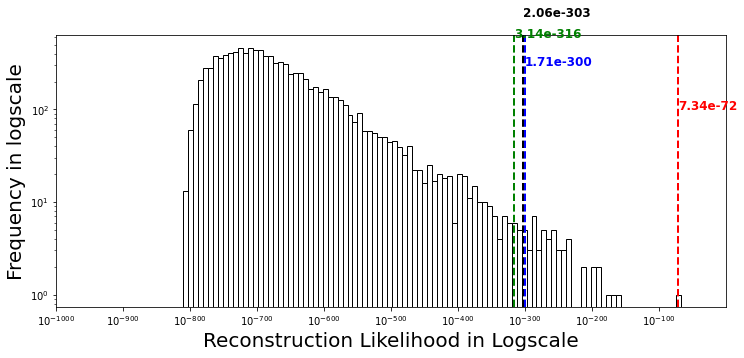

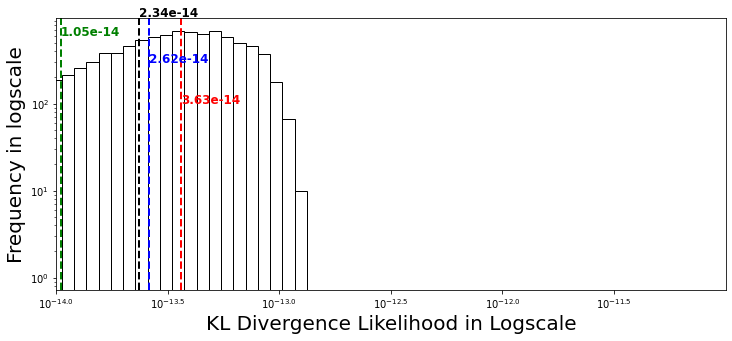

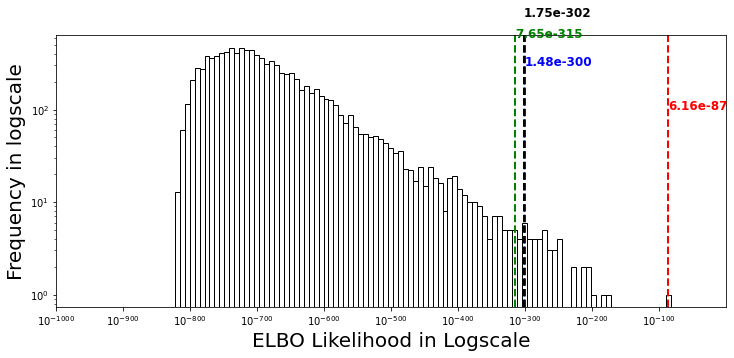

Writing gdrive/My Drive/Colab Notebooks/Coupled VAE Public/v9pt1_August_02_2022/683342/test/shot_noise_1/metrics/table__beta_1.0_zdim_256_p_std_1.0_coupling_0.1000000015_seed683342.csv


In [15]:
test_VAE_loop(
    my_vae=vae,
    datasets=testing_datasets_dict,
    dataset_type=dataset_type,
    test_path=testing_path, 
    show_display=True,
    random_seed=random_seed,
    test_coupling=1e-6
    )

In [16]:
#January 7, 2023
#Assume run has finished successfully.
#Grab a image at random. 
#Produce 3 realizations of z  (1) Get rid of seed=0 in Sampler (2) pass in 
#vae is the instance of the object

#Decode and exhibit them.